In [3]:
"""Business Question: Crime is on the rise in the United States and Portsmouth, Virginia, is crime as bad as media and pundits claim?
Data source: is Portsmouth, Virginia's Arrest Search for Thursday, November 17, 2022 to Friday, December 30, 2022. 

In [4]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
# Read in the Excel data source

df = pd.read_excel("C:/Users/rakim/OneDrive/Desktop/Portfolio/Data Engineer Track/Python/Portsmouth VA Arrest Search - 12 09 22/arrest.xlsx")

In [6]:
# Combine Race and Sex columns into new column

df["Race_Sex"] = df["Race"] + df["Sex"]

In [7]:
# Reveal the top five rows

df.head()

,Day,Date,Time,Name,Race,Sex,Age,Charge,Charge Description,Case ID,Race_Sex
0,Thursday,2022-11-17,1147,"GOOD, JASON LEROY",W,M,42,PB-15,PAROLE BOARD WARRANT - PB15,NaN,WM
1,Thursday,2022-11-17,842,"SUMMER, KAHEEM WALI",B,M,43,19.2-82.1,FALSE IDENTIFY SELF TO LAW ENFORCEMENT,2.022014e+09,BM
2,Thursday,2022-11-17,1534,"JONES, GAIL PAMELA",B,F,56,18.2-96|[M],PETIT LARCENY,2.022014e+09,BF
3,Thursday,2022-11-17,1534,"JONES, GAIL PAMELA",B,F,56,18.2-186.3,IDENTITY THEFT: USE TO AVOID ARREST,2.022014e+09,BF
4,Thursday,2022-11-17,1621,"JONES, GAIL PAMELA",B,F,56,18.2-456(6),FAIL TO APPEAR-FEL/MISD/SUMONS,NaN,BF


In [8]:
# Remove the Name, Charge, and Case ID columns. We don't want identities revealed. 

df.drop(['Name', "Charge", "Case ID"], axis=1)

,Day,Date,Time,Race,Sex,Age,Charge Description,Race_Sex
0,Thursday,2022-11-17,1147,W,M,42,PAROLE BOARD WARRANT - PB15,WM
1,Thursday,2022-11-17,842,B,M,43,FALSE IDENTIFY SELF TO LAW ENFORCEMENT,BM
2,Thursday,2022-11-17,1534,B,F,56,PETIT LARCENY,BF
3,Thursday,2022-11-17,1534,B,F,56,IDENTITY THEFT: USE TO AVOID ARREST,BF
4,Thursday,2022-11-17,1621,B,F,56,FAIL TO APPEAR-FEL/MISD/SUMONS,BF
...,...,...,...,...,...,...,...,...
389,Thursday,2022-12-29,2220,B,F,42,ESCAPE WITHOUT FORCE BY MISDEMEANANT,BF
390,Friday,2022-12-30,844,B,M,47,CONTEMPT OF COURT,BM
391,Friday,2022-12-30,844,B,M,47,REVOCATION OF SUSPENDED SENTENCE AND PROBATION,BM
392,Friday,2022-12-30,1015,B,M,47,"DESTRUCTION OF PROPERTY, GENERAL",BM


In [9]:
# Convert Time column into a time variable. 

time = df["Time"]

In [10]:
# Calculate the average time

time.mean()

1221.9137055837564

In [11]:
# Calculate the median time

time.median()

1242.5

In [12]:
# Calculate the minimum time 

time.min()

3

In [13]:
# Calculate the maximum time

time.max()

2359

In [14]:
# Count the sum of each race and sex combination. 

race_sex_count = df.groupby(["Race_Sex"]).size()
race_sex_count

Race_Sex
AM      1
BF     59
BM    242
UM      2
WF     23
WM     67
dtype: int64

In [15]:
# Group each day of the week and then count

occur = df.groupby(["Day"]).size()

In [16]:
# Show the occur variable 

display(occur)

Day
Friday       57
Monday       56
Saturday     60
Sunday       24
Thursday     74
Tuesday      76
Wednesday    47
dtype: int64

In [17]:
# Tuesday is the day when the maximum number of crimes occurred
# Find the day with most crimes

occur.max()

76

In [18]:
# Sunday had the fewest crimes
# Find the day with the least crimes

occur.min()

24

In [19]:
# Friday was the median number of crimes
# Find the day with the median number of crimes 

occur.median()

57.0

In [20]:
# Create a race variable that groups the categories together and counts them

race = df.groupby(["Race"]).size()

In [21]:
# Show the count of each race for the Race column

race

Race
A      1
B    301
U      2
W     90
dtype: int64

In [22]:
# Create gender variable and count each group

gender = df.groupby(["Sex"]).size()
gender

Sex
F     82
M    312
dtype: int64

In [23]:
# Age summary statistics

df["Age"].describe()

count    394.000000
mean      36.845178
std       10.344641
min       18.000000
25%       30.000000
50%       35.000000
75%       42.000000
max       73.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

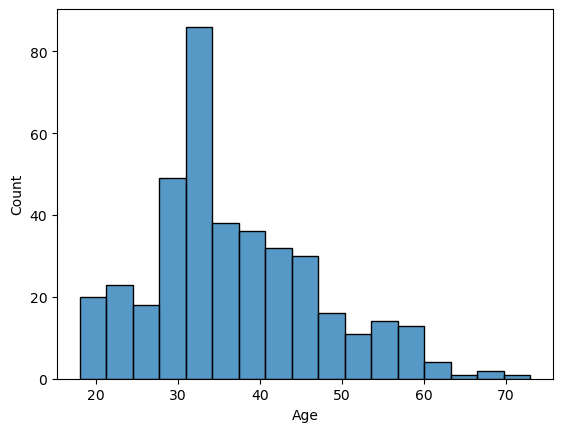

In [24]:
sns.histplot(data = df, x = df["Age"])

<AxesSubplot:xlabel='Race', ylabel='Age'>

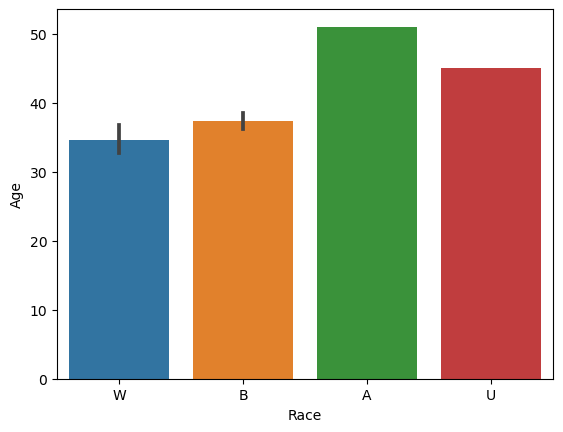

In [25]:
# Age and Race Bar Plot
sns.barplot(data = df, x = "Race", y = "Age")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

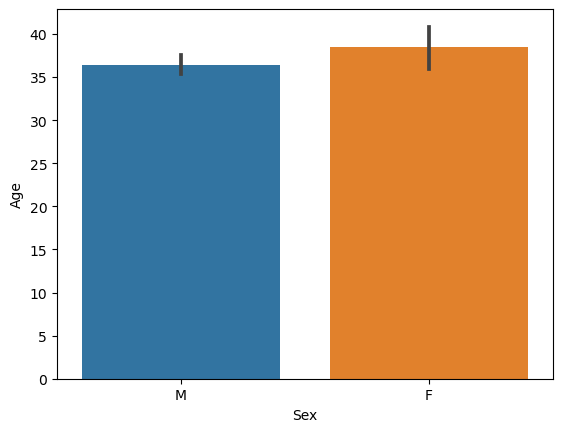

In [26]:
# Age & Gender Bar Plot
sns.barplot(data = df, x = "Sex", y = "Age")

<AxesSubplot:xlabel='Race_Sex', ylabel='Count'>

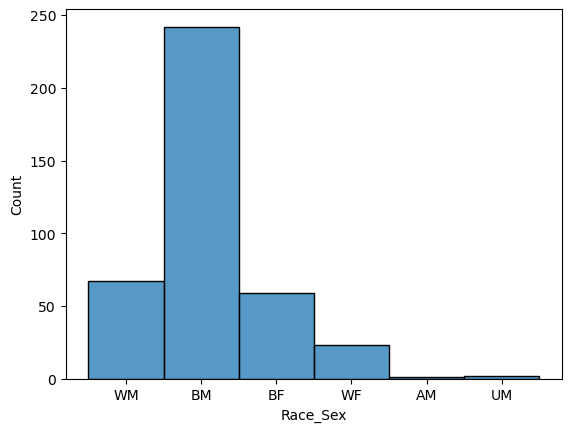

In [27]:
# Race_Sex Count
sns.histplot(data = df, x = "Race_Sex", palette = "Blue")

<AxesSubplot:xlabel='Time', ylabel='Count'>

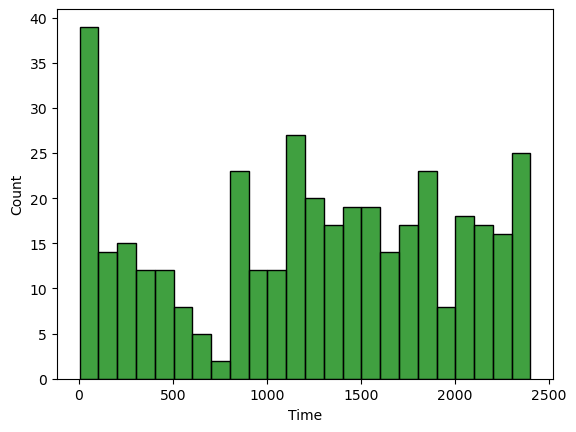

In [28]:
# Histogram of Time when arrest occurred
# My car got hit at ~10:30am right when crime starts to occur usually.

sns.histplot(data = df, x = "Time", color = "green", binwidth = 100)

In [29]:
# Create a charges variable to show the count of each type of charge 

charges = df.groupby(["Charge Description"]).size()
charges

Charge Description
18.2-460. OBSTRUCTING JUSTICE; RESISTING ARREST; FLEEING FRS    5
ABDUCTION & KIDNAPPING                                          4
ABUSE AND NEGLECT OF CHILDREN                                   3
ACCIDENTS - HIT AND RUN RESULTING IN INJURY AND/OR DEATH [FE    2
AGGRAVATED MALICIOUS WOUNDING                                   2
                                                               ..
VIOLATE CONDITION OF RELEASE                                    3
VIOLATION OF COMMUNITY CORRECTIONS PROGRAM                      1
VIOLATION OF PROTECTIVE ORDER THIRD OFFENSE                     1
VIOLATION OF STALKING PROTECTIVE ORDER                          2
WEARING MASK IN PUBLIC PLACE                                    2
Length: 91, dtype: int64

In [30]:
# Create the charge_text variable and count the charges

charge_text = df.groupby(["Charge Description"]).size()
charge_text

Charge Description
18.2-460. OBSTRUCTING JUSTICE; RESISTING ARREST; FLEEING FRS    5
ABDUCTION & KIDNAPPING                                          4
ABUSE AND NEGLECT OF CHILDREN                                   3
ACCIDENTS - HIT AND RUN RESULTING IN INJURY AND/OR DEATH [FE    2
AGGRAVATED MALICIOUS WOUNDING                                   2
                                                               ..
VIOLATE CONDITION OF RELEASE                                    3
VIOLATION OF COMMUNITY CORRECTIONS PROGRAM                      1
VIOLATION OF PROTECTIVE ORDER THIRD OFFENSE                     1
VIOLATION OF STALKING PROTECTIVE ORDER                          2
WEARING MASK IN PUBLIC PLACE                                    2
Length: 91, dtype: int64

In [32]:
# Get summary statistics for the charges

charge_text.describe()

count    91.000000
mean      4.329670
std       6.211199
min       1.000000
25%       1.000000
50%       2.000000
75%       4.500000
max      38.000000
dtype: float64

In [33]:
# Sort charges in descending order

sorted_charge = charge_text.sort_values(ascending = False)

In [34]:
# Print full sorted charge by converting variable to string
charge_count = print(sorted_charge.to_string())

Charge Description
FAIL TO APPEAR-FEL/MISD/SUMONS                                  38
ASSAULT & BATTERY - FAMILY MEMBER                               28
REVOCATION OF SUSPENDED SENTENCE AND PROBATION                  26
CONTEMPT OF COURT                                               17
ASSAULT & BATTERY                                               17
FELONIOUS ASSAULT                                               14
PETIT LARCENY                                                   12
POSSESS, TRANSPORT FIREARMS BY CONVICTED FELONS                 12
OBSTRUCT/RESIST                                                 11
DESTRUCTION OF PROPERTY, GENERAL                                11
TRESPASSING                                                     10
POSSESSION OF CONTROLLED SUBSTANCES                             10
DRIVING UNDER THE INFLUENCE OF ALCOHOL                           9
ROBBERY                                                          8
DISORDERLY CONDUCT                         

In [1]:
"""
207 people have 394 charges, or about just under 2 charges per person arrested
207 people over 45 days 
8.11 periods of 45 days in a year times 207
1678 people arrested estimated for all of 2022
97,915 people in Portsmouth, VA 
1678 arrests / 97,915 people = 1.71% of population arrested (presumed innocent until guilty) in 2022 and four charges of murder (murder and 1st degree murder)
Most arrest are for procedural violations (parole violations, didn't show up for court). 

"""
